In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("F:/DSC 640_Data/Week 9&10 Data/costcos-geocoded.csv")
df.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Address    417 non-null    object 
 1   City       417 non-null    object 
 2   State      417 non-null    object 
 3   Zip Code   417 non-null    object 
 4   Latitude   417 non-null    float64
 5   Longitude  417 non-null    float64
dtypes: float64(2), object(4)
memory usage: 19.7+ KB


In [5]:
import seaborn as sns

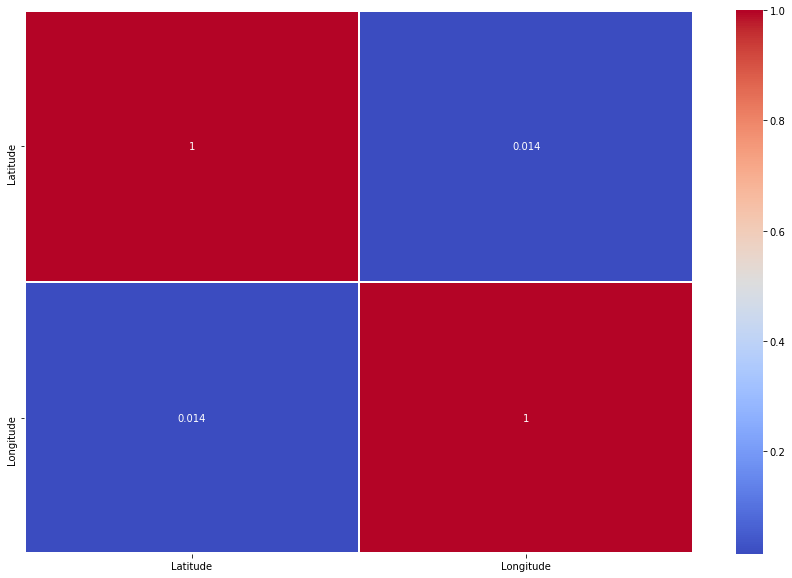

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

In [12]:
from matplotlib import cm

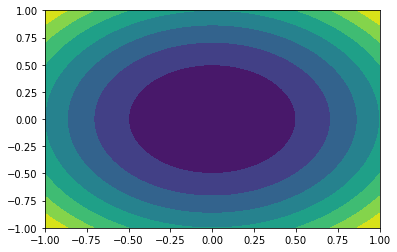

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
u = np.linspace(-1,1,100)
x, y = np.meshgrid(u,u)
z = x**2 + y**2
ax.contourf(x,y,z)
plt.show()

In [16]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure, ColumnDataSource
from bokeh.tile_providers import get_provider, Vendors
from bokeh.palettes import PRGn, RdYlGn
from bokeh.transform import linear_cmap,factor_cmap
from bokeh.layouts import row, column
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter

In [17]:
# Define function to switch from lat/long to mercator coordinates
def x_coord(x, y):
    
    lat = x
    lon = y
    
    r_major = 6378137.000
    x = r_major * np.radians(lon)
    scale = x/lon
    y = 180.0/np.pi * np.log(np.tan(np.pi/4.0 + 
        lat * (np.pi/180.0)/2.0)) * scale
    return (x, y)
# Define coord as tuple (lat,long)
df['coordinates'] = list(zip(df['Latitude'], df['Longitude']))
# Obtain list of mercator coordinates
mercators = [x_coord(x, y) for x, y in df['coordinates'] ]

In [18]:
# Create mercator column in our df
df['mercator'] = mercators
# Split that column out into two separate columns - mercator_x and mercator_y
df[['mercator_x', 'mercator_y']] = df['mercator'].apply(pd.Series)

In [20]:
df['Price']=np.random.randint(1,100, size=len(df))

In [21]:
# Examine our modified DataFrame
df.head()

,Address,City,State,Zip Code,Latitude,Longitude,coordinates,mercator,mercator_x,mercator_y,Price
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955,"(34.743094899999996, -86.6009553)","(-9640374.246207045, 4129023.341958216)",-9.640374e+06,4.129023e+06,37
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420,"(33.377649, -86.81241999999999)","(-9663914.388931798, 3945538.5044474667)",-9.663914e+06,3.945539e+06,24
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884,"(32.363889, -86.15088399999999)","(-9590272.538270378, 3811172.0691007767)",-9.590273e+06,3.811172e+06,15
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000,"(58.3592, -134.483)","(-14970579.08035181, 8043155.813635133)",-1.497058e+07,8.043156e+06,8
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217,"(61.143266000000004, -149.884217)","(-16685034.714388518, 8658793.6566211)",-1.668503e+07,8.658794e+06,60


In [22]:
# Select tile set to use
chosentile = get_provider(Vendors.STAMEN_TONER)

In [23]:
# Choose palette
palette = PRGn[11]

In [24]:
# Tell Bokeh to use df as the source of the data
source = ColumnDataSource(data=df)

In [25]:
# Define color mapper - which column will define the colour of the data points
color_mapper = linear_cmap(field_name = 'Price', palette = palette, low = df['Price'].min(), high = df['Price'].max())

In [26]:
# Set tooltips - these appear when we hover over a data point in our map, very nifty and very useful
tooltips = [("Price","@Price"), ("Region","@State")]

In [27]:
# Create figure
p = figure(title = 'Shoe Prices by region in the United States', x_axis_type="mercator", y_axis_type="mercator", x_axis_label = 'Longitude', y_axis_label = 'Latitude', tooltips = tooltips)

In [28]:
# Add map tile
p.add_tile(chosentile)

TileRenderer(id='1048', ...)

In [29]:
# Add points using mercator coordinates
p.circle(x = 'mercator_x', y = 'mercator_y', color = color_mapper, source=source, size=30, fill_alpha = 0.7)

GlyphRenderer(id='1055', ...)

In [30]:
#Defines color bar
color_bar = ColorBar(color_mapper=color_mapper['transform'], 
                     formatter = NumeralTickFormatter(format='0.0[0000]'), 
                     label_standoff = 13, width=8, location=(0,0))
# Set color_bar location
p.add_layout(color_bar, 'right')

In [31]:
# Display in notebook
output_notebook()
# Save as HTML
output_file('avocado.html', title='Avocado Prices by region in the United States')

Loading BokehJS ...

In [32]:
# Show map
show(p)